### Part 0: Data preset

In [1]:
import pandas as pd
import numpy as np

loading market insight data and split the data into training and testing set

In [2]:
market_data = pd.read_csv('data/selected_GBREB.csv').drop(["Unnamed: 0"], axis=1)
market_data

,Units Sold,Active Listings,Months Supply of Inventory,New Listings,Pending Sales,Days to Off Market,Sold to Original Price Ratio,Price per Square Foot,year,month,MEDV
0,830,1749,2.1,909,686,72.0,0.960,291,2017,1,520.0
1,610,1218,2.0,829,601,49.0,0.977,484,2017,1,500.0
2,114,324,2.8,129,95,80.0,0.941,302,2017,1,677.5
3,28,85,3.0,37,31,61.0,0.965,241,2017,1,356.0
4,138,217,1.6,145,101,52.0,0.977,279,2017,1,490.0
...,...,...,...,...,...,...,...,...,...,...,...
209,576,1187,2.1,726,435,22.0,1.010,794,2022,6,749.5
210,169,241,1.4,233,148,20.0,1.030,373,2022,6,920.0
211,48,125,2.6,79,48,20.0,0.986,383,2022,6,1125.0
212,6,36,6.0,20,8,26.0,0.961,761,2022,6,2687.5


In [3]:
from sklearn.model_selection import train_test_split

MX = market_data.drop(["MEDV"], axis=1)
my = market_data["MEDV"]

MX_train, MX_test, my_train, my_test = train_test_split(MX, my, test_size=0.2, random_state=123)

loading housing data and split the data into training and testing set

In [4]:
housing_data = pd.read_csv('data/selected_statslib.csv').drop(["Unnamed: 0"], axis=1)
housing_data

,RM,PTRATIO,LSTAT,MEDV,year
0,6.575,15.3,4.98,24.0,1993
1,6.421,17.8,9.14,21.6,1993
2,7.185,17.8,4.03,34.7,1993
3,6.998,18.7,2.94,33.4,1993
4,7.147,18.7,5.33,36.2,1993
...,...,...,...,...,...
501,6.593,21.0,9.67,22.4,1993
502,6.120,21.0,9.08,20.6,1993
503,6.976,21.0,5.64,23.9,1993
504,6.794,21.0,6.48,22.0,1993


In [5]:
from sklearn.model_selection import train_test_split

HX = housing_data.drop(["MEDV"], axis=1)
hy = housing_data["MEDV"]

HX_train, HX_test, hy_train, hy_test = train_test_split(HX, hy, test_size=0.2, random_state=123)

### Part 1: Linear Regression Model

**For Market Insight Data**
>Fit a linear regression model to the training set. Report the training and test MSE obtained.

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Fit the linear regression model on the training data
lr_market = LinearRegression()
lr_market.fit(MX_train, my_train)

# Make predictions on the training and test data
my_train_pred = lr_market.predict(MX_train)
my_test_pred = lr_market.predict(MX_test)

# Calculate the mean squared error for the training and test data
market_train_mse = mean_squared_error(my_train, my_train_pred)
market_test_mse = mean_squared_error(my_test, my_test_pred)

# Print the training and test MSE
print("Market Insight Data Training MSE:", market_train_mse)
print("Market Insight Data Test MSE:", market_test_mse)

Market Insight Data Training MSE: 144318.79599425234
Market Insight Data Test MSE: 80036.25469589818


**For Housing Data**
>Fit a linear regression model to the training set. Report the training and test MSE obtained.

In [7]:
# Fit the linear regression model on the training data
lr_housing = LinearRegression()
lr_housing.fit(HX_train, hy_train)

# Make predictions on the training and test data
hy_train_pred = lr_housing.predict(HX_train)
hy_test_pred = lr_housing.predict(HX_test)

# Calculate the mean squared error for the training and test data
housing_train_mse = mean_squared_error(hy_train, hy_train_pred)
housing_test_mse = mean_squared_error(hy_test, hy_test_pred)

# Print the training and test MSE
print("Housing Data Training MSE:", housing_train_mse)
print("Housing Data Test MSE:", housing_test_mse)

Housing Data Training MSE: 24.726218114745905
Housing Data Test MSE: 37.131254167769924


### Part 2: Polyomial Linear Regression Model

**For Market Insight Data**
>Fit a polynomial linear regression model to the training set. Report the training and test MSE obtained.

In [9]:
from sklearn.model_selection import LeaveOneOut, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import math

# Apply Polynomial Regression to the dataset
for i in range(1, 6):
    poly = PolynomialFeatures(degree = i, include_bias = False)
    MX_poly = poly.fit_transform(MX_train)
    loo = LeaveOneOut()
    scores = cross_val_score(LinearRegression(), MX_poly, my_train, cv=loo, scoring='neg_mean_squared_error')
    mse = -scores.mean()
    rmse = math.sqrt(mse)
    print(f'The RMSE of polynomial regression with degree {str(i)} is: {rmse:.4f}')

The RMSE of polynomial regression with degree 1 is: 417.5861
The RMSE of polynomial regression with degree 2 is: 555.8164
The RMSE of polynomial regression with degree 3 is: 67321.5151
The RMSE of polynomial regression with degree 4 is: 784386.0032
The RMSE of polynomial regression with degree 5 is: 7177533.4120


**For Housing Data**
>Fit a polynomial linear regression model to the training set. Report the training and test MSE obtained.

In [10]:
from sklearn.model_selection import LeaveOneOut, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import math

# Apply Polynomial Regression to the dataset
for i in range(1, 6):
    poly = PolynomialFeatures(degree = i, include_bias = False)
    HX_poly = poly.fit_transform(HX_train)
    loo = LeaveOneOut()
    scores = cross_val_score(LinearRegression(), HX_poly, hy_train, cv=loo, scoring='neg_mean_squared_error')
    mse = -scores.mean()
    rmse = math.sqrt(mse)
    print(f'The RMSE of polynomial regression with degree {str(i)} is: {rmse:.4f}')

The RMSE of polynomial regression with degree 1 is: 5.0663
The RMSE of polynomial regression with degree 2 is: 4.0174
The RMSE of polynomial regression with degree 3 is: 4.6133
The RMSE of polynomial regression with degree 4 is: 5.2917
The RMSE of polynomial regression with degree 5 is: 6.8321


### Part 3: Regression Tree Model

**For Market Insight Data**
>Fit a regression tree to the training set. Print the tree, and interpret the results. Report the training and test MSE obtained. 

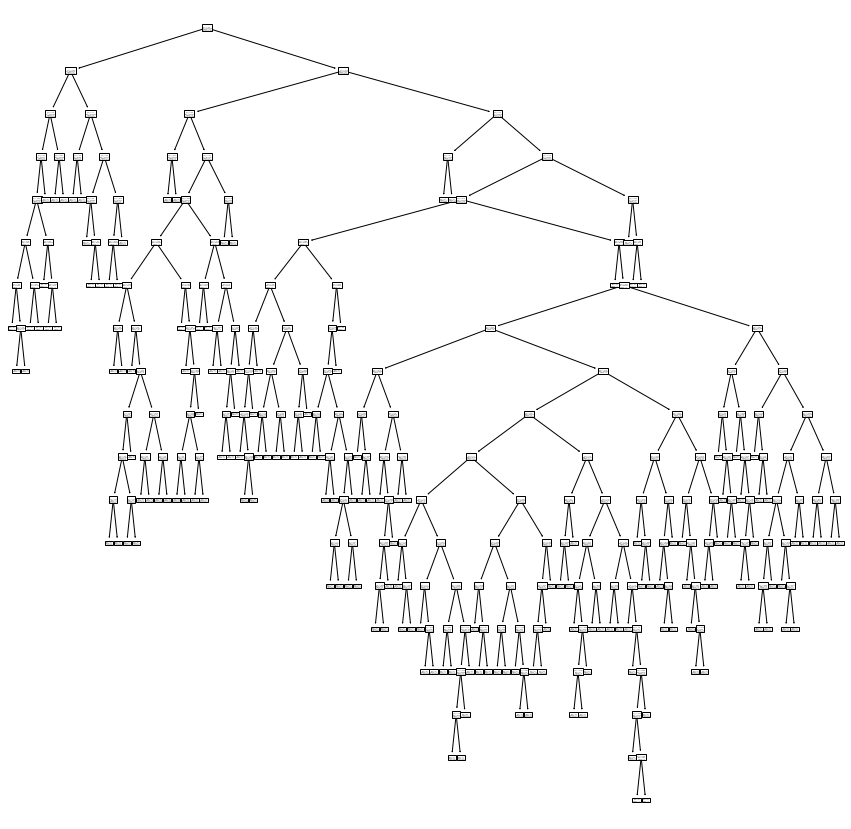

In [12]:
# Fit the regression tree to the training set
from sklearn.tree import DecisionTreeRegressor, plot_tree
market_tree = DecisionTreeRegressor(random_state = 123)
market_tree.fit(MX_train, my_train)

# Plot the regression tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15, 15))
plot_tree(market_tree)
plt.show()

In [13]:
# Calculating the test MSE
from sklearn.metrics import mean_squared_error
my_pred_test = market_tree.predict(MX_test)
market_mse_test = mean_squared_error(my_test, my_pred_test)
print("The test MSE for Decision Tree Regressor: {:.5f}".format(market_mse_test))

my_pred_train = market_tree.predict(MX_train)
market_mse_train = mean_squared_error(my_train, my_pred_train)
print("The train MSE for Decision Tree Regressor: {:.5f}".format(market_mse_train))

The test MSE for Decision Tree Regressor: 94747.78048
The train MSE for Decision Tree Regressor: 0.00000


**For Housing Data**
>Fit a regression tree to the training set. Print the tree, and interpret the results. Report the training and test MSE obtained. 

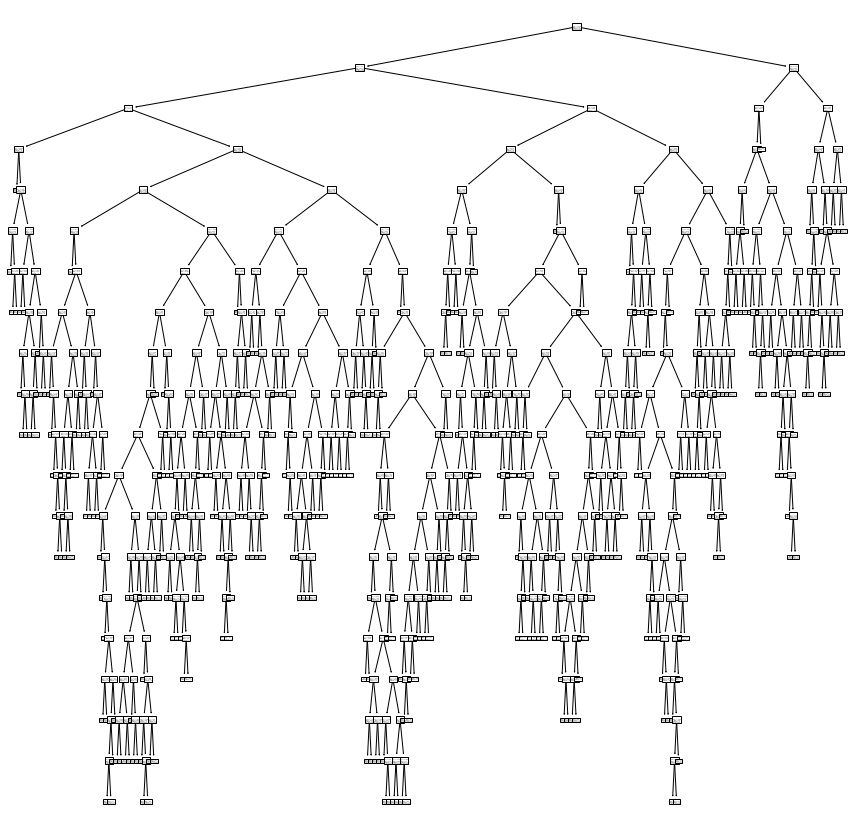

In [14]:
# Fit the regression tree to the training set
from sklearn.tree import DecisionTreeRegressor, plot_tree
housing_tree = DecisionTreeRegressor(random_state = 123)
housing_tree.fit(HX_train, hy_train)

# Plot the regression tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15, 15))
plot_tree(housing_tree)
plt.show()

In [16]:
# Calculating the test MSE
from sklearn.metrics import mean_squared_error
hy_pred_test = housing_tree.predict(HX_test)
housing_mse_test = mean_squared_error(hy_test, hy_pred_test)
print("The test MSE for Decision Tree Regressor: {:.5f}".format(housing_mse_test))

hy_pred_train = housing_tree.predict(HX_train)
housing_mse_train = mean_squared_error(hy_train, hy_pred_train)
print("The train MSE for Decision Tree Regressor: {:.5f}".format(housing_mse_train))

The test MSE for Decision Tree Regressor: 40.55569
The train MSE for Decision Tree Regressor: 0.00000


### Part 4: Random Forest Model

**For Market Insight Data**
>Fit a random forest tree to the training set. Report the training and test MSE obtained. 

In [17]:
from sklearn.ensemble import RandomForestRegressor
# Fit a random forest regressor
for i in [3, 7, 11]:
    rfr = RandomForestRegressor(n_estimators=i, n_jobs=-1, random_state=123)
    rfr.fit(MX_train, my_train)
    y_pred_test = rfr.predict(MX_test)
    mse_test = mean_squared_error(my_test, my_pred_test)
    print("The test MSE for Random Forests Model: {:.5f}".format(mse_test))
    y_pred_train = rfr.predict(MX_train)
    mse_train = mean_squared_error(my_train, my_pred_train)
    print("The train MSE for Random Forests Model: {:.5f}".format(mse_train))

# Identify the most important features
rf_feature_importances = rfr.feature_importances_
for i, feature_name in enumerate(MX_train.columns):
    print(f"{feature_name}: {rf_feature_importances[i]:.3f}")

The test MSE for Random Forests Model: 94747.78048
The train MSE for Random Forests Model: 0.00000
The test MSE for Random Forests Model: 94747.78048
The train MSE for Random Forests Model: 0.00000
The test MSE for Random Forests Model: 94747.78048
The train MSE for Random Forests Model: 0.00000
Units Sold: 0.015
Active Listings: 0.314
Months Supply of Inventory: 0.060
New Listings: 0.116
Pending Sales: 0.247
Days to Off Market: 0.016
Sold to Original Price Ratio: 0.025
Price per Square Foot: 0.192
year: 0.010
month: 0.005


**For Housing Data**
>Fit a random forest tree to the training set. Report the training and test MSE obtained. 

In [18]:
from sklearn.ensemble import RandomForestRegressor
# Fit a random forest regressor
for i in [3, 7, 11]:
    rfr = RandomForestRegressor(n_estimators=i, n_jobs=-1, random_state=123)
    rfr.fit(HX_train, hy_train)
    y_pred_test = rfr.predict(HX_test)
    mse_test = mean_squared_error(hy_test, hy_pred_test)
    print("The test MSE for Random Forests Model: {:.5f}".format(mse_test))
    y_pred_train = rfr.predict(HX_train)
    mse_train = mean_squared_error(hy_train, hy_pred_train)
    print("The train MSE for Random Forests Model: {:.5f}".format(mse_train))

# Identify the most important features
rf_feature_importances = rfr.feature_importances_
for i, feature_name in enumerate(HX_train.columns):
    print(f"{feature_name}: {rf_feature_importances[i]:.3f}")

The test MSE for Random Forests Model: 40.55569
The train MSE for Random Forests Model: 0.00000
The test MSE for Random Forests Model: 40.55569
The train MSE for Random Forests Model: 0.00000
The test MSE for Random Forests Model: 40.55569
The train MSE for Random Forests Model: 0.00000
RM: 0.566
PTRATIO: 0.065
LSTAT: 0.370
year: 0.000
